In [38]:
from understatscraper import Understat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
understat = Understat()

In [5]:
# Getafe match ids

ids = [17136,17154,17162,17167,17184,17187,17205,17214,17221,17232,17244,17253,17265,17269,17279,17289,17296,17310,
      17323,17333,17342,17352,17361]
ids = [str(x) for x in ids]

In [10]:
# creating dataframe

df = pd.DataFrame()
for x in ids:
    df_getafe = understat.single_match(x)
    df = df.append(df_getafe)

In [18]:
enes = df[df.player == 'Enes Ünal']

In [28]:
enes[['X','Y','xG']] = enes[['X','Y','xG']].apply(pd.to_numeric,axis=1)

In [31]:
enes['date'] = pd.to_datetime(enes['date'])

In [36]:
enes['xg_cumulative'] = enes['xG'].cumsum()

In [46]:
enes['goal'] = np.where(enes['result']=='Goal',1,0)
enes['goal_cumulative'] = enes['goal'].cumsum()

### xG flow chart

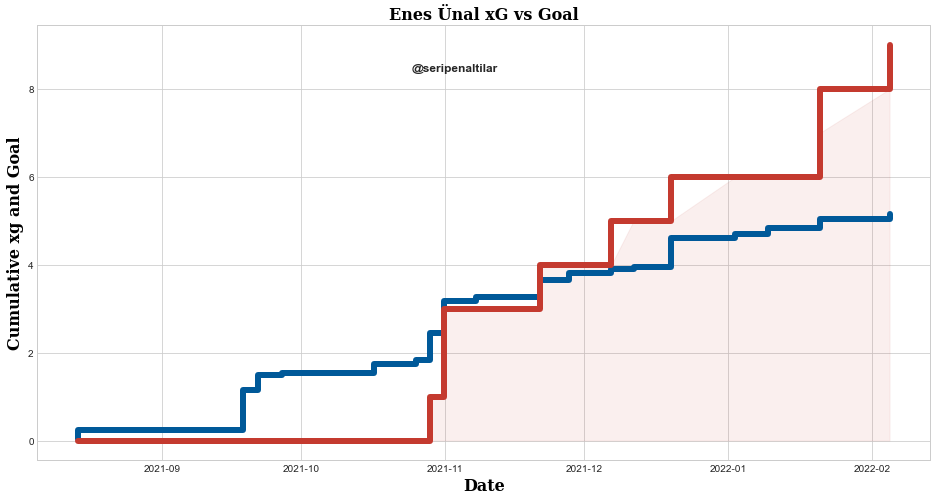

In [65]:
plt.style.use('seaborn-whitegrid')
fig,ax = plt.subplots(figsize=(16,8))

ax.step(x=enes['date'],y=enes['xg_cumulative'],c="#005999",linewidth=6)
ax.step(x=enes['date'],y=enes['goal_cumulative'],c="#C43A2F",linewidth=6)

plt.fill_between(enes['date'],enes['goal_cumulative'],alpha=0.08,color="#C43A2F")

font = {'family': 'serif',
       'color': 'black',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('Date',fontdict=font)
plt.ylabel('Cumulative xg and Goal', fontdict=font)
plt.title('Enes Ünal xG vs Goal',fontdict=font)

plt.figtext(0.45,0.8,'@seripenaltilar',fontweight="bold",fontsize=12)

plt.show()